In [1]:
import hopsworks
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



In [2]:
project = hopsworks.login()
fs = project.get_feature_store()


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/221335
Connected. Call `.close()` to terminate connection gracefully.


In [14]:
wine_fg = fs.get_feature_group(name = 'wine_v2', version = 2)
query = wine_fg.select_except(['residual_sugar', 'ph', 'sulphates', 'date_added', 'id'])
lr_feature_view = fs.get_or_create_feature_view(name = 'wine_lr_features', 
                                             version = 1,
                                             description = "read from wine dataset",
                                            labels = ['quality'], 
                                            query = query)


Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/221335/fs/221254/fv/wine_lr_features/version/1


In [8]:
query = wine_fg.select_except(['date_added', 'id'])
dt_feature_view = fs.get_or_create_feature_view(name = 'wine_dt_features', 
                                             version = 1,
                                             description = "read from wine dataset",
                                            labels = ['quality'], 
                                            query = query)

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/221335/fs/221254/fv/wine_dt_features/version/1


In [15]:
X_train, X_test, y_train, y_test = lr_feature_view.train_test_split(0.2)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

Finished: Reading data from Hopsworks, using ArrowFlight (1.36s) 


LinearRegression()

In [16]:
X_train

,type,fixed_acidity,volatile_acidity,citric_acid,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,alcohol
1,0,6.900000,0.320000,0.130000,0.042000,11.000000,117.000000,0.996000,9.200000
2,1,12.300000,0.390000,0.630000,0.091000,6.000000,18.000000,1.000400,9.500000
3,0,6.600000,0.390000,0.390000,0.057000,51.000000,221.000000,0.998510,8.900000
4,1,8.000000,0.380000,0.060000,0.078000,12.000000,49.000000,0.996250,9.900000
5,1,9.700000,0.690000,0.320000,0.088000,22.000000,91.000000,0.997900,10.100000
...,...,...,...,...,...,...,...,...,...
6500,0,7.558483,0.579708,0.449580,0.020521,29.475605,133.548184,0.998186,11.241735
6501,1,6.174934,0.313869,0.348732,0.054924,24.929624,97.398991,0.990653,10.129270
6502,1,7.785834,0.206528,0.104212,0.075750,43.354048,123.725156,0.995175,11.925072
6503,0,9.386749,0.346672,0.368628,0.042194,40.924786,144.833320,0.995634,8.430741


In [17]:
y_train

,quality
1,5
2,5
3,6
4,6
5,5
...,...
6500,9
6501,6
6502,3
6503,6


In [18]:
# Coefficients of the Linear Regression line
features = X_train.columns.tolist()
print('Intercept of Regression \t: b = ', lr_model.intercept_)
print()

for i,x in enumerate(features):
  print('Coefficient of ' +x + ' \t: ', lr_model.coef_[0][i])
print()


Intercept of Regression 	: b =  [-40.13476545]

Coefficient of type 	:  0.06145555668780303
Coefficient of fixed_acidity 	:  -0.03964965570601645
Coefficient of volatile_acidity 	:  -1.5177736731189702
Coefficient of citric_acid 	:  0.012900362795810208
Coefficient of chlorides 	:  -0.4509223717668841
Coefficient of free_sulfur_dioxide 	:  0.0057729786652027035
Coefficient of total_sulfur_dioxide 	:  -0.0017262938320933771
Coefficient of density 	:  42.99105469836886
Coefficient of alcohol 	:  0.3831011005891343



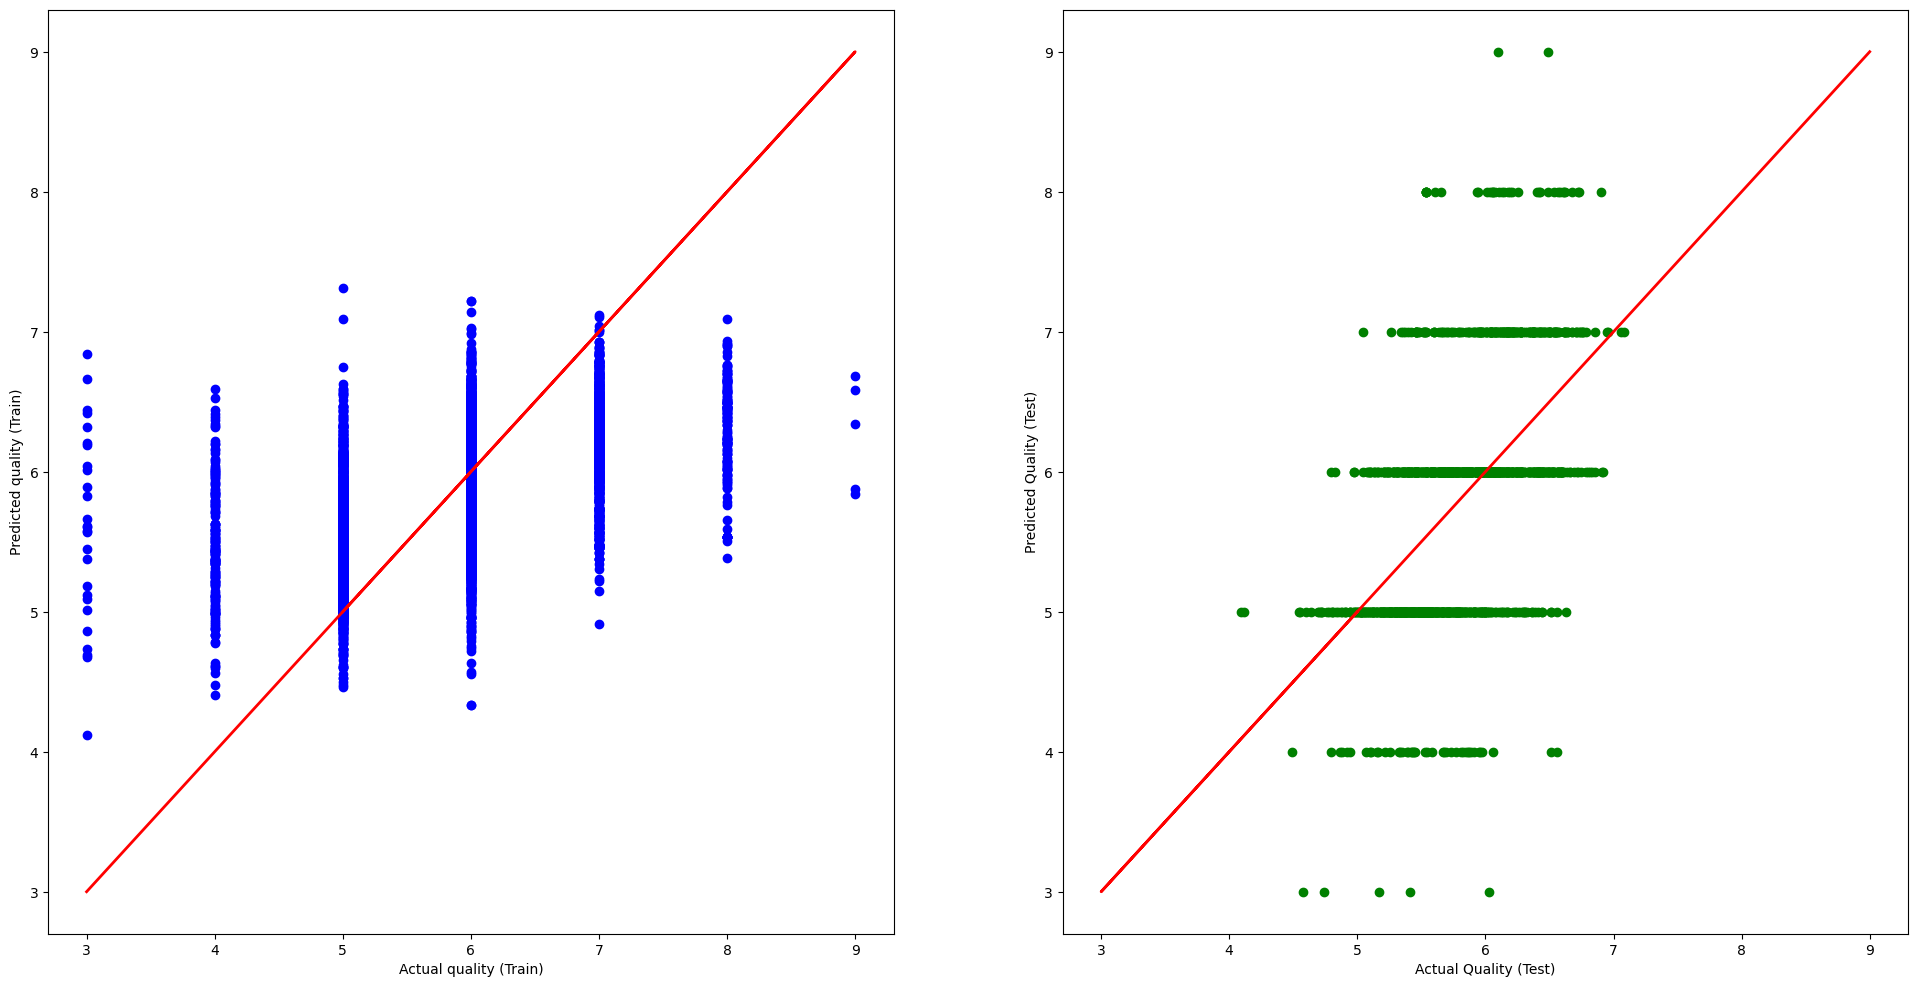

In [19]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("Actual quality (Train)")
axes[0].set_ylabel("Predicted quality (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("Actual Quality (Test)")
axes[1].set_ylabel("Predicted Quality (Test)")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lr_model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.27664462665999323
Mean Squared Error (MSE) 	: 0.5576398451123868

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.266289455943325
Mean Squared Error (MSE) 	: 0.5565747467704422



In [21]:
dt_classifier = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = dt_feature_view.train_test_split(0.2)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the average of the cross-validation scores
print("Average cross-validation score:", cv_scores.mean())



Finished: Reading data from Hopsworks, using ArrowFlight (1.49s) 


Cross-validation scores: [0.58541267 0.58733205 0.59309021 0.60652591 0.6        0.55769231
 0.60384615 0.60576923 0.58846154 0.59230769]
Average cross-validation score: 0.5920437767606673


In [22]:
# Train the model on the full training set
dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6015384615384616



<Axes: >

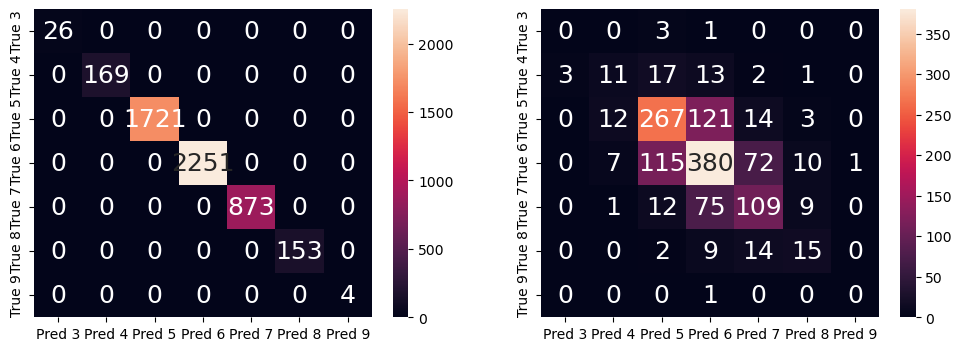

In [14]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dt_classifier.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dt_classifier.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
train_cm = pd.DataFrame(
            confusion_matrix(y_train, y_train_pred), 
           ['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9'], 
           ['Pred 3', 'Pred 4', 'Pred 5', 'Pred 6', 'Pred 7', 'Pred 8', 'Pred 9'],
           )

sb.heatmap(train_cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

test_cm = pd.DataFrame(
            confusion_matrix(y_test, y_test_pred), 
           ['True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9'], 
           ['Pred 3', 'Pred 4', 'Pred 5', 'Pred 6', 'Pred 7', 'Pred 8', 'Pred 9'],
           )

sb.heatmap(test_cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [23]:
import os
import joblib
from hsml.schema import Schema
from hsml.model_schema import ModelSchema

# Directory for the Linear Regression model
lr_model_dir = "linear_regression_model"
if not os.path.isdir(lr_model_dir):
    os.mkdir(lr_model_dir)

# Save the Linear Regression model
joblib.dump(lr_model, lr_model_dir + "/linear_regression_model.pkl")

# Directory for the Decision Tree model
dt_model_dir = "decision_tree_model"
if not os.path.isdir(dt_model_dir):
    os.mkdir(dt_model_dir)

# Save the Decision Tree model
joblib.dump(dt_classifier, dt_model_dir + "/decision_tree_model.pkl")

# Assuming X_train and y_train are your features and labels
input_schema = Schema(X_train)
output_schema = Schema(y_train)
model_schema = ModelSchema(input_schema, output_schema)

# Get an object for the model registry
mr = project.get_model_registry()

# Create and save the Linear Regression model
lr_model_entry = mr.python.create_model(
    name="linear_regression_model",
    description="Linear Regression Model",
    # Add any relevant metrics or additional info
)

lr_model_entry.save(lr_model_dir)

# Create and save the Decision Tree model
dt_model_entry = mr.python.create_model(
    name="decision_tree_model",
    description="Decision Tree Model",
    # Add any relevant metrics or additional info
)

dt_model_entry.save(dt_model_dir)



Connected. Call `.close()` to terminate connection gracefully.


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/1106 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/221335/models/linear_regression_model/3


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading: 0.000%|          | 0/313843 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/221335/models/decision_tree_model/2


Model(name: 'decision_tree_model', version: 2)